# Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from geopy.geocoders import Nominatim
import overpy
from igraph import *
import pickle

# Get data

In [2]:
city_name = "Ha Noi"

# Geocoding request via Nominatim
geolocator = Nominatim(user_agent="city_compare")
geo_results = geolocator.geocode(city_name, exactly_one=False, limit=3)

# Searching for relation in result set
for r in geo_results:
    print(r.address, r.raw.get("osm_type"))
    if r.raw.get("osm_type") == "relation":
        city = r
        break

# Calculating area id
area_id = int(city.raw.get("osm_id")) + 3600000000
area_id

Hà Nội, Việt Nam relation


3601903516

In [3]:
import overpy
from geojson import Polygon

api = overpy.Overpass()

# fetch all ways and nodes
result = api.query("""
    [out:json][timeout:25];
    area(3601903516)->.searchArea;
    (
      // query part for: “admin_level=10”
      //node["admin_level"="6"](area.searchArea);
      //way["admin_level"="10"](area.searchArea);
      relation["admin_level"="6"](area.searchArea);
    );
    // print results
    out body;
    >;
    out skel qt;
    """)

In [4]:
list_relation=[x + 3600000000 for x in result.relation_ids]
list_relation

[3607114806,
 3607114815,
 3607114823,
 3607114829,
 3607114847,
 3607115003,
 3607115008,
 3607115194,
 3607115367,
 3607115398,
 3607115580,
 3607115593,
 3607115632,
 3607115635,
 3607115709,
 3607115759,
 3607115780,
 3607115795,
 3607115863,
 3609421130,
 3609421131,
 3609421132,
 3609421133,
 3609421134,
 3609421135,
 3609421136,
 3609421137,
 3609421138,
 3609421139,
 3609424587]

In [17]:
dir(result.ways[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_attribute_modifiers',
 '_node_ids',
 '_result',
 '_type_value',
 'attributes',
 'center_lat',
 'center_lon',
 'from_json',
 'from_xml',
 'get_center_from_json',
 'get_center_from_xml_dom',
 'get_nodes',
 'id',
 'nodes',
 'tags']

In [3]:
way=dict()
for s in list_relation:
    api = overpy.Overpass()
    # fetch all ways and nodes
    way[s] = api.query("""
        [out:json][timeout:25];
        area(%s)->.searchArea;
        (
        // query part for: “admin_level=10”
        //node["admin_level"="6"](area.searchArea);
        way(area.searchArea);
        //relation["admin_level"="6"](area.searchArea);
        );
        // print results
        out body;
        >;
        out skel qt;
        """%(s))

NameError: name 'list_relation' is not defined

In [ ]:
import dill
filename='../way.pkl'
with open(filename, 'wb') as f:
    dill.dump(way, f)

In [14]:
import overpy
from geojson import Polygon

api = overpy.Overpass()

# fetch all ways and nodes
result = api.query("""
    [out:json][timeout:25];
    area(3601903516)->.searchArea;
    (
      // query part for: “admin_level=10”
      //node(area.searchArea);
      way(area.searchArea);
      //relation["admin_level"="6"](area.searchArea);
    );
    // print results
    out body;
    >;
    out skel qt;
    """)

In [15]:
import dill
filename='../way.pkl'
with open(filename, 'wb') as f:
    dill.dump(result, f)

In [16]:
import overpy
from geojson import Polygon

api = overpy.Overpass()

# fetch all ways and nodes
result = api.query("""
    [out:json][timeout:25];
    area(3601903516)->.searchArea;
    (
      // query part for: “admin_level=10”
      node(area.searchArea);
      //way(area.searchArea);
      //relation["admin_level"="6"](area.searchArea);
    );
    // print results
    out body;
    >;
    out skel qt;
    """)

In [17]:
import dill
filename='node.pkl'
with open(filename, 'wb') as f:
    dill.dump(result, f)

In [21]:
# Contructs Graph

IGRAPH UN-- 30 0 --
+ attr: name (v)


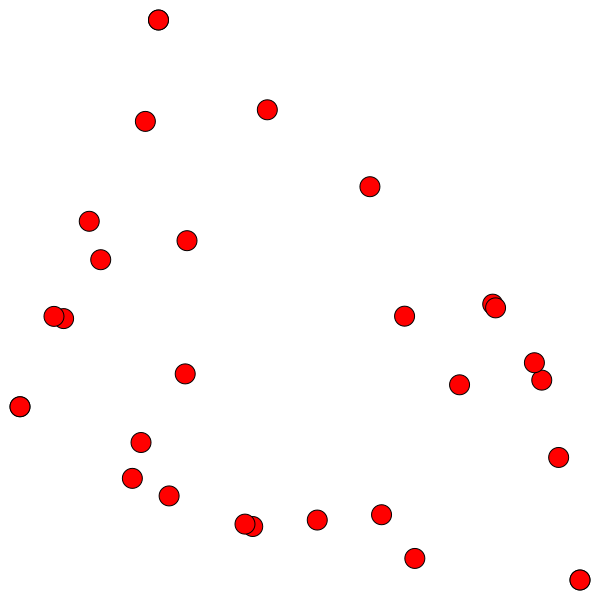

In [23]:
layout = g.layout("kk")
plot(g, layout = layout)

In [32]:
way[3607114806].way_ids

[10045075,
 10046571,
 10047217,
 10047796,
 10047852,
 10047949,
 10048048,
 10048345,
 10049443,
 10049446,
 24425124,
 33924418,
 33924430,
 37376190,
 37377798,
 37377799,
 37377800,
 37377801,
 37377802,
 37377803,
 37377804,
 37377805,
 37377806,
 37377808,
 37377809,
 37377810,
 37378234,
 37378235,
 37378695,
 37378696,
 37378697,
 37378698,
 37378699,
 37378700,
 37378701,
 37378702,
 37378703,
 37378704,
 37378705,
 37378892,
 37378893,
 37378894,
 37378895,
 37378896,
 37530461,
 37530463,
 37530464,
 37530465,
 37530466,
 37530468,
 37530470,
 37530471,
 37530472,
 37530473,
 37530475,
 37530476,
 37530477,
 37530479,
 37530481,
 37530482,
 37530483,
 37530484,
 37530485,
 37530486,
 37530487,
 37530488,
 37530489,
 37530490,
 37530491,
 37530492,
 37530493,
 37530494,
 37530495,
 37530496,
 37530497,
 37530498,
 37530502,
 37530503,
 37530504,
 37530506,
 37530507,
 37530508,
 37530509,
 37530510,
 37530511,
 37530512,
 37530513,
 37530681,
 90236197,
 90236203,
 125808697